In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import string, nltk
import nltk.data
nltk.download('punkt')
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
df = pd.read_csv('fake reviews.csv')
df.head()

,category,rating,label,text_,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Sidhu_Dental_Hospital,5,CG,"Love this! Well made, sturdy, and very comfor...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sidhu_Dental_Hospital,5,CG,"love it, a great upgrade from the original. I...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sidhu_Dental_Hospital,5,CG,This pillow saved my back. I love the look and...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sidhu_Dental_Hospital,1,CG,"Missing information on how to use it, but it i...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sidhu_Dental_Hospital,5,CG,Very nice set. Good quality. We have had the s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

category           0
rating             0
label              0
text_              0
Unnamed: 4     40432
Unnamed: 5     40432
Unnamed: 6     40432
Unnamed: 7     40432
Unnamed: 8     40432
Unnamed: 9     40432
Unnamed: 10    40432
Unnamed: 11    40432
Unnamed: 12    40432
Unnamed: 13    40430
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   category     40432 non-null  object 
 1   rating       40432 non-null  int64  
 2   label        40432 non-null  object 
 3   text_        40432 non-null  object 
 4   Unnamed: 4   0 non-null      float64
 5   Unnamed: 5   0 non-null      float64
 6   Unnamed: 6   0 non-null      float64
 7   Unnamed: 7   0 non-null      float64
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
 10  Unnamed: 10  0 non-null      float64
 11  Unnamed: 11  0 non-null      float64
 12  Unnamed: 12  0 non-null      float64
 13  Unnamed: 13  2 non-null      object 
dtypes: float64(9), int64(1), object(4)
memory usage: 4.3+ MB


In [ ]:
df.describe()

,rating,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
count,40432.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,4.256579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.144354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['rating'].value_counts()

5    24559
4     7965
3     3786
1     2155
2     1967
Name: rating, dtype: int64

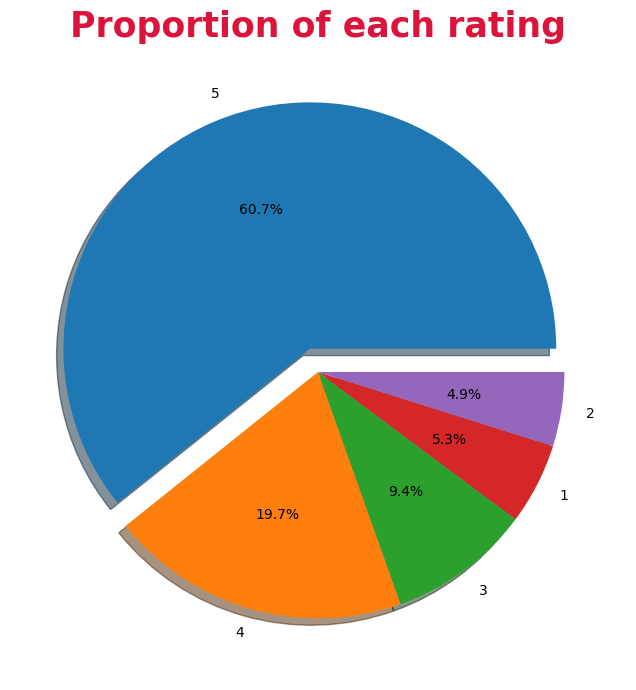

In [ ]:
plt.figure(figsize=(15,8))
labels = df['rating'].value_counts().keys()
values = df['rating'].value_counts().values
explode = (0.1,0,0,0,0)
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.title('Proportion of each rating',fontweight='bold',fontsize=25,pad=20,color='crimson')
plt.show()

In [ ]:
def clean_text(text):
    nopunc = [w for w in text if w not in string.punctuation]
    nopunc = ''.join(nopunc)
    return  ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [ ]:
df['text_'][0], clean_text(df['text_'][0])

('Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty',
 'Love Well made sturdy comfortable love itVery pretty')

In [ ]:
df['text_'].head().apply(clean_text)

0    Love Well made sturdy comfortable love itVery ...
1    love great upgrade original Ive mine couple years
2              pillow saved back love look feel pillow
3          Missing information use great product price
4                 nice set Good quality set two months
Name: text_, dtype: object

In [ ]:
df.shape

(40432, 14)

In [ ]:
df['text_'] = df['text_'].astype(str)

In [ ]:
def preprocess(text):
  return ' '.join([word for word in word_tokenize(text)if word not in stopwords.words('english')and not word.isdigit()and word not in string.punctuation])

In [ ]:
preprocess(df['text_'][4])

'Very nice set Good quality We set two months'

In [ ]:
df['text_'][:10000] = df['text_'][:10000].apply(preprocess)

In [ ]:
df['text_'][10001:20000] = df['text_'][10001:20000].apply(preprocess)

In [ ]:
df['text_'][20001:30000] = df['text_'][20001:30000].apply(preprocess)

In [ ]:
df['text_'][30001:40000] = df['text_'][30001:40000].apply(preprocess)

In [ ]:
df['text_'][40001:40432] = df['text_'][40001:40432].apply(preprocess)

In [ ]:
df['text_'] = df['text_'].str.lower()

In [ ]:
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])
df['text_'] = df['text_'].apply(lambda x: stem_words(x))

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df["text_"] = df["text_"].apply(lambda text: lemmatize_words(text))

In [ ]:
df['text_'].head()

0    love well made sturdi comfort i love veri pretti
1      love great upgrad origin i 've mine coupl year
2        thi pillow save back i love look feel pillow
3               miss inform use great product price i
4         veri nice set good qualiti we set two month
Name: text_, dtype: object

In [ ]:
df.to_csv('Preprocessed fake reviews .csv')

PART 2


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings, string
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv('/content/Preprocessed fake reviews .csv')
df.head()

,Unnamed: 0,category,rating,label,text_,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,0,Sidhu_Dental_Hospital,5,CG,love well made sturdi comfort i love veri pretti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sidhu_Dental_Hospital,5,CG,love great upgrad origin i 've mine coupl year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sidhu_Dental_Hospital,5,CG,thi pillow save back i love look feel pillow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Sidhu_Dental_Hospital,1,CG,miss inform use great product price i,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Sidhu_Dental_Hospital,5,CG,veri nice set good qualiti we set two month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop('Unnamed: 5',axis=1,inplace=True)
df.drop('Unnamed: 6',axis=1,inplace=True)
df.drop('Unnamed: 7',axis=1,inplace=True)
df.drop('Unnamed: 8',axis=1,inplace=True)
df.drop('Unnamed: 9',axis=1,inplace=True)
df.drop('Unnamed: 10',axis=1,inplace=True)
df.drop('Unnamed: 11',axis=1,inplace=True)
df.drop('Unnamed: 12',axis=1,inplace=True)
df.drop('Unnamed: 13',axis=1,inplace=True)

In [ ]:
df.head()

,category,rating,label,text_,Unnamed: 4
0,Sidhu_Dental_Hospital,5,CG,love well made sturdi comfort i love veri pretti,NaN
1,Sidhu_Dental_Hospital,5,CG,love great upgrad origin i 've mine coupl year,NaN
2,Sidhu_Dental_Hospital,5,CG,thi pillow save back i love look feel pillow,NaN
3,Sidhu_Dental_Hospital,1,CG,miss inform use great product price i,NaN
4,Sidhu_Dental_Hospital,5,CG,veri nice set good qualiti we set two month,NaN


In [ ]:
df.drop('Unnamed: 4',axis=1,inplace=True)

In [ ]:
df.head()

,category,rating,label,text_
0,Sidhu_Dental_Hospital,5,CG,love well made sturdi comfort i love veri pretti
1,Sidhu_Dental_Hospital,5,CG,love great upgrad origin i 've mine coupl year
2,Sidhu_Dental_Hospital,5,CG,thi pillow save back i love look feel pillow
3,Sidhu_Dental_Hospital,1,CG,miss inform use great product price i
4,Sidhu_Dental_Hospital,5,CG,veri nice set good qualiti we set two month


In [ ]:
df.dropna(inplace=True)

In [ ]:
df['length'] = df['text_'].apply(len)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40431 entries, 0 to 40431
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  40431 non-null  object
 1   rating    40431 non-null  int64 
 2   label     40431 non-null  object
 3   text_     40431 non-null  object
 4   length    40431 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.9+ MB


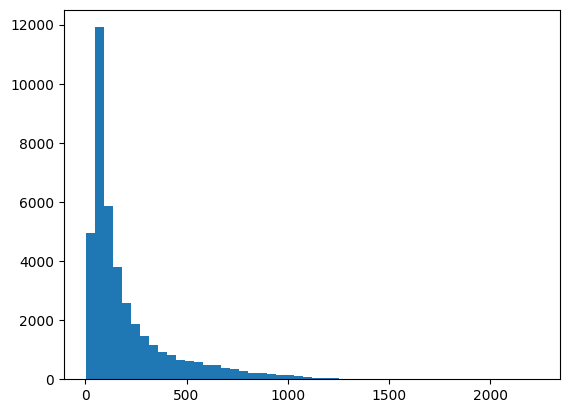

In [ ]:
plt.hist(df['length'],bins=50)
plt.show()

In [ ]:
df.groupby('label').describe()

rating                                                length  \
         count      mean       std  min  25%  50%  75%  max    count   
label                                                                  
CG     20215.0  4.259906  1.141092  1.0  4.0  5.0  5.0  5.0  20215.0   
OR     20216.0  4.253265  1.147652  1.0  4.0  5.0  5.0  5.0  20216.0   

                                                                
             mean         std  min   25%    50%    75%     max  
label                                                           
CG     173.617264  173.955112  4.0  57.0   99.0  217.0  1300.0  
OR     237.848486  252.868028  4.0  74.0  134.0  296.0  2232.0

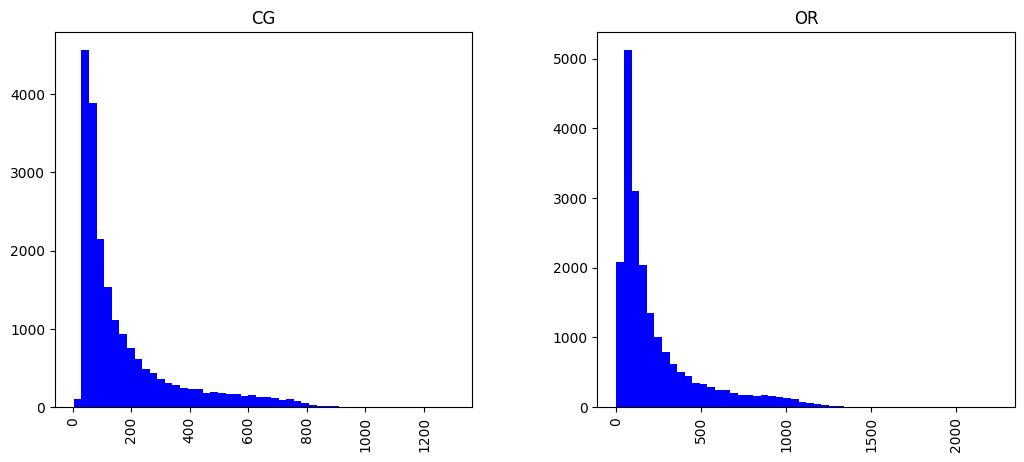

In [ ]:
df.hist(column='length',by='label',bins=50,color='blue',figsize=(12,5))
plt.show()

In [ ]:
df[df['label']=='OR'][['text_','length']].sort_values(by='length',ascending=False).head().iloc[0].text_

"weak on current scienc after see twice i agre much posit five star review out respect read review i 'll repeat everyth i like present i found goofi over ear hairdo facial hair arrang daniel vitali describ `` wild food expert '' distract ugh ditto david wolf extrem goofi wild hairdo on hand jon gabriel describ `` author weight loss expert '' nice groom good present hi stori person transform fellow pound whew becom jock normal weight inspir christian northrup preserv rank one america 's cutest doctor a realli nice look woman present dr. mercola jason vale kri carr alejandro junger fine it disappoint jami oliv popular uk give babi cow growth fluid pas unscientif popular idea milk none present anyth zilch say work doctor t. colin campbel milk bodi bad it good see present take stand sugar they agre evil sugar refin carbohydr with respect dr. northrup `` it 's fat make fat 's sugar '' statement pas muster commun expert recogn evil sugar not mutual exclus recogn proven danger fat particularl

In [ ]:
df.length.describe()

count    40431.000000
mean       205.733670
std        219.390063
min          4.000000
25%         64.000000
50%        116.000000
75%        253.000000
max       2232.000000
Name: length, dtype: float64

In [ ]:
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
bow_transformer = CountVectorizer(analyzer=text_process)
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x7f4854ec0dc0>)

In [ ]:
bow_transformer.fit(df['text_'])
print("Total Vocabulary:",len(bow_transformer.vocabulary_))

Total Vocabulary: 34446


In [ ]:
review4 = df['text_'][3]
review4

'miss inform use great product price i'

In [ ]:
bow_msg4 = bow_transformer.transform([review4])
print(bow_msg4)
print(bow_msg4.shape)

  (0, 13596)	1
  (0, 15838)	1
  (0, 19846)	1
  (0, 23845)	1
  (0, 23975)	1
  (0, 32180)	1
(1, 34446)


In [ ]:
print(bow_transformer.get_feature_names()[15841])
print(bow_transformer.get_feature_names()[23848])

AttributeError: ignored

In [ ]:
bow_reviews = bow_transformer.transform(df['text_'])

In [ ]:
print("Shape of Bag of Words Transformer for the entire reviews corpus:",bow_reviews.shape)
print("Amount of non zero values in the bag of words model:",bow_reviews.nnz)

Shape of Bag of Words Transformer for the entire reviews corpus: (40431, 34446)
Amount of non zero values in the bag of words model: 1013733


In [ ]:
print("Sparsity:",np.round((bow_reviews.nnz/(bow_reviews.shape[0]*bow_reviews.shape[1]))*100,2))

Sparsity: 0.07


In [ ]:
tfidf_transformer = TfidfTransformer().fit(bow_reviews)
tfidf_rev4 = tfidf_transformer.transform(bow_msg4)
print(bow_msg4)

  (0, 13596)	1
  (0, 15838)	1
  (0, 19846)	1
  (0, 23845)	1
  (0, 23975)	1
  (0, 32180)	1


In [ ]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['mango']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['book']])

10.91422964906803
2.821684385176731


In [ ]:
tfidf_reviews = tfidf_transformer.transform(bow_reviews)
print("Shape:",tfidf_reviews.shape)
print("No. of Dimensions:",tfidf_reviews.ndim)

Shape: (40431, 34446)
No. of Dimensions: 2


Creating training and testing data

In [ ]:
review_train, review_test, label_train, label_test = train_test_split(df['text_'],df['label'],test_size=0.35)

In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

NameError: ignored

Training and testing Multinomial Naive Bayes Algorithm on the preprocessed data

In [ ]:
pipeline.fit(review_train,label_train)

NameError: ignored

In [ ]:
predictions = pipeline.predict(review_test)
predictions

array(['CG', 'CG', 'CG', ..., 'CG', 'OR', 'OR'], dtype='<U2')

In [ ]:
print('Classification Report:',classification_report(label_test,predictions))
print('Confusion Matrix:',confusion_matrix(label_test,predictions))
print('Accuracy Score:',accuracy_score(label_test,predictions))

Classification Report:               precision    recall  f1-score   support

          CG       0.82      0.88      0.85      7109
          OR       0.87      0.81      0.84      7042

    accuracy                           0.85     14151
   macro avg       0.85      0.85      0.85     14151
weighted avg       0.85      0.85      0.85     14151

Confusion Matrix: [[6291  818]
 [1343 5699]]
Accuracy Score: 0.8472899441735566


In [ ]:
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')

Model Prediction Accuracy: 84.73%


In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [ ]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7ffb163e99d0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [ ]:
rfc_pred = pipeline.predict(review_test)
rfc_pred

array(['CG', 'CG', 'CG', ..., 'CG', 'OR', 'CG'], dtype=object)

In [ ]:
print('Classification Report:',classification_report(label_test,rfc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,rfc_pred))
print('Accuracy Score:',accuracy_score(label_test,rfc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.81      0.88      0.85      7109
          OR       0.87      0.79      0.83      7042

    accuracy                           0.84     14151
   macro avg       0.84      0.84      0.84     14151
weighted avg       0.84      0.84      0.84     14151

Confusion Matrix: [[6281  828]
 [1472 5570]]
Accuracy Score: 0.8374673167973995
Model Prediction Accuracy: 83.75%


In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',DecisionTreeClassifier())
])

In [ ]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7ffb163e99d0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', DecisionTreeClassifier())])

In [ ]:
dtree_pred = pipeline.predict(review_test)
dtree_pred

array(['CG', 'CG', 'CG', ..., 'OR', 'OR', 'CG'], dtype=object)

In [ ]:
print('Classification Report:',classification_report(label_test,dtree_pred))
print('Confusion Matrix:',confusion_matrix(label_test,dtree_pred))
print('Accuracy Score:',accuracy_score(label_test,dtree_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.73      0.75      0.74      7109
          OR       0.74      0.71      0.73      7042

    accuracy                           0.73     14151
   macro avg       0.73      0.73      0.73     14151
weighted avg       0.73      0.73      0.73     14151

Confusion Matrix: [[5327 1782]
 [2013 5029]]
Accuracy Score: 0.7318210727157092
Model Prediction Accuracy: 73.18%


In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',KNeighborsClassifier(n_neighbors=2))
])

In [ ]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7ffb163e99d0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', KNeighborsClassifier(n_neighbors=2))])

In [ ]:
knn_pred = pipeline.predict(review_test)
knn_pred

array(['CG', 'CG', 'CG', ..., 'CG', 'CG', 'CG'], dtype=object)

In [ ]:
print('Classification Report:',classification_report(label_test,knn_pred))
print('Confusion Matrix:',confusion_matrix(label_test,knn_pred))
print('Accuracy Score:',accuracy_score(label_test,knn_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.55      0.97      0.70      7109
          OR       0.86      0.19      0.31      7042

    accuracy                           0.58     14151
   macro avg       0.70      0.58      0.51     14151
weighted avg       0.70      0.58      0.51     14151

Confusion Matrix: [[6895  214]
 [5703 1339]]
Accuracy Score: 0.5818670058653099
Model Prediction Accuracy: 58.19%


In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC())
])

In [ ]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7ffb163e99d0>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

In [ ]:
svc_pred = pipeline.predict(review_test)
svc_pred

array(['CG', 'CG', 'CG', ..., 'CG', 'OR', 'CG'], dtype=object)

In [ ]:
print('Classification Report:',classification_report(label_test,svc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,svc_pred))
print('Accuracy Score:',accuracy_score(label_test,svc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.89      0.86      0.88      7109
          OR       0.86      0.89      0.88      7042

    accuracy                           0.88     14151
   macro avg       0.88      0.88      0.88     14151
weighted avg       0.88      0.88      0.88     14151

Confusion Matrix: [[6122  987]
 [ 761 6281]]
Accuracy Score: 0.8764751607660236
Model Prediction Accuracy: 87.65%


In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
])

In [ ]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7ffb163e99d0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [ ]:
lr_pred = pipeline.predict(review_test)
lr_pred

array(['CG', 'CG', 'CG', ..., 'CG', 'OR', 'CG'], dtype=object)

In [ ]:
print('Classification Report:',classification_report(label_test,lr_pred))
print('Confusion Matrix:',confusion_matrix(label_test,lr_pred))
print('Accuracy Score:',accuracy_score(label_test,lr_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.86      0.85      0.86      7109
          OR       0.85      0.86      0.86      7042

    accuracy                           0.86     14151
   macro avg       0.86      0.86      0.86     14151
weighted avg       0.86      0.86      0.86     14151

Confusion Matrix: [[6040 1069]
 [ 952 6090]]
Accuracy Score: 0.857183237933715
Model Prediction Accuracy: 85.72%


Conclusion

In [ ]:
print('Performance of various models:')
print('\n')
print('Logistic Regression Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')
print('K Nearest Neighbors Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')
print('Decision Tree Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')
print('Random Forests Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')
print('Support Vector Machines Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')
print('Multinomial Naive Bayes Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')

Performance of various models:


Logistic Regression Prediction Accuracy: 85.72%
K Nearest Neighbors Prediction Accuracy: 58.19%
Decision Tree Classifier Prediction Accuracy: 73.18%
Random Forests Classifier Prediction Accuracy: 83.75%
Support Vector Machines Prediction Accuracy: 87.65%
Multinomial Naive Bayes Prediction Accuracy: 84.73%
